In [1]:
# Load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset alt. the path
df = pd.read_csv(r"C:\electronic_product_sales.csv.zip")

# Inspect the dataset
print(df.shape)  # Dimensions of the dataset
print(df.sample(10))  # Sample rows to observe the structure
print(df.info())  # Data types and missing values
print(df.describe())  # Summary statistics

# Check for missing values
print(df.isnull().sum())


(185950, 6)
        Order ID                     Product  Quantity Ordered  Price Each  \
24127     318837          Macbook Pro Laptop                 1     1700.00   
165689    230205  Bose SoundSport Headphones                 1       99.99   
139043    143378       AA Batteries (4-pack)                 1        3.84   
58845     165433    Lightning Charging Cable                 3       14.95   
52132     158996  Bose SoundSport Headphones                 1       99.99   
77221     243214            Wired Headphones                 1       11.99   
34073     185270            Wired Headphones                 1       11.99   
8701      304005       AA Batteries (4-pack)                 2        3.84   
147328    248977  Bose SoundSport Headphones                 1       99.99   
76070     242114          Macbook Pro Laptop                 1     1700.00   

                 Order Date                          Purchase Address  
24127   2019-12-30 01:31:00  294 Highland St, San Francis

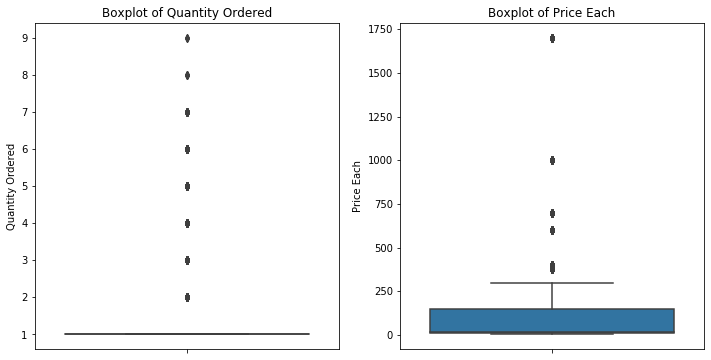

In [2]:
# Create boxplots to observe outliers
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for 'Quantity Ordered'
sns.boxplot(y=df['Quantity Ordered'], ax=axes[0])
axes[0].set_title('Boxplot of Quantity Ordered')

# Boxplot for 'Price Each'
sns.boxplot(y=df['Price Each'], ax=axes[1])
axes[1].set_title('Boxplot of Price Each')

# Display the plots
plt.show()


In [4]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Verify the data type conversion
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  int64         
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 8.5+ MB
None


In [5]:
# Add a new column for total sales
df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']

# Display the updated dataset
print(df.head())


   Order ID               Product  Quantity Ordered  Price Each  \
0    295665    Macbook Pro Laptop                 1     1700.00   
1    295666    LG Washing Machine                 1      600.00   
2    295667  USB-C Charging Cable                 1       11.95   
3    295668      27in FHD Monitor                 1      149.99   
4    295669  USB-C Charging Cable                 1       11.95   

           Order Date                        Purchase Address  Total Sales  
0 2019-12-30 00:01:00  136 Church St, New York City, NY 10001      1700.00  
1 2019-12-29 07:03:00     562 2nd St, New York City, NY 10001       600.00  
2 2019-12-12 18:21:00    277 Main St, New York City, NY 10001        11.95  
3 2019-12-22 15:13:00     410 6th St, San Francisco, CA 94016       149.99  
4 2019-12-18 12:38:00           43 Hill St, Atlanta, GA 30301        11.95  


In [6]:
# Calculate the average price for each product
average_price_per_product = df.groupby('Product')['Price Each'].mean()

# Sort and display the top 10 most expensive products
top_10_expensive_products = average_price_per_product.sort_values(ascending=False).head(10)
print(top_10_expensive_products)


Product
Macbook Pro Laptop        1700.00
ThinkPad Laptop            999.99
iPhone                     700.00
LG Dryer                   600.00
LG Washing Machine         600.00
Google Phone               600.00
Vareebadd Phone            400.00
27in 4K Gaming Monitor     389.99
34in Ultrawide Monitor     379.99
Flatscreen TV              300.00
Name: Price Each, dtype: float64


In [7]:
# Sum total sales by product
total_sales_per_product = df.groupby('Product')['Total Sales'].sum()

# Sort and display the top 10 products by sales
top_10_products_by_sales = total_sales_per_product.sort_values(ascending=False).head(10)
print(top_10_products_by_sales)


Product
Macbook Pro Laptop            8037600.00
iPhone                        4794300.00
ThinkPad Laptop               4129958.70
Google Phone                  3319200.00
27in 4K Gaming Monitor        2435097.56
34in Ultrawide Monitor        2355558.01
Apple Airpods Headphones      2349150.00
Flatscreen TV                 1445700.00
Bose SoundSport Headphones    1345565.43
27in FHD Monitor              1132424.50
Name: Total Sales, dtype: float64


In [9]:
# Extract month and year from 'Order Date'
df['Month'] = df['Order Date'].dt.month
# Group by 'Month' and sum the 'Total Sales'
monthly_sales = df.groupby('Month')['Total Sales'].sum().reset_index()
monthly_sales

,Month,Total Sales
0,1,1.822257e+06
1,2,2.202022e+06
2,3,2.807100e+06
3,4,3.390670e+06
4,5,3.152607e+06
5,6,2.577802e+06
6,7,2.647776e+06
7,8,2.244468e+06
8,9,2.097560e+06
9,10,3.736727e+06


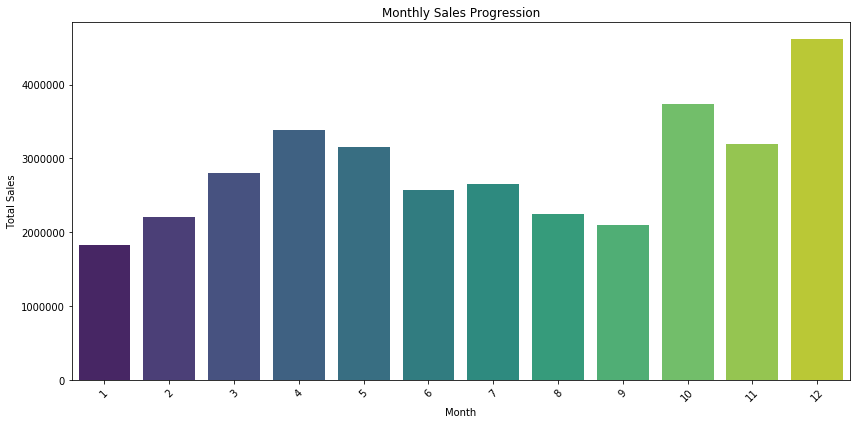

In [10]:
# Plotting the monthly sales using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='Month', y='Total Sales', palette='viridis')

# Adding titles and labels
plt.title('Monthly Sales Progression')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\marou\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\marou\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


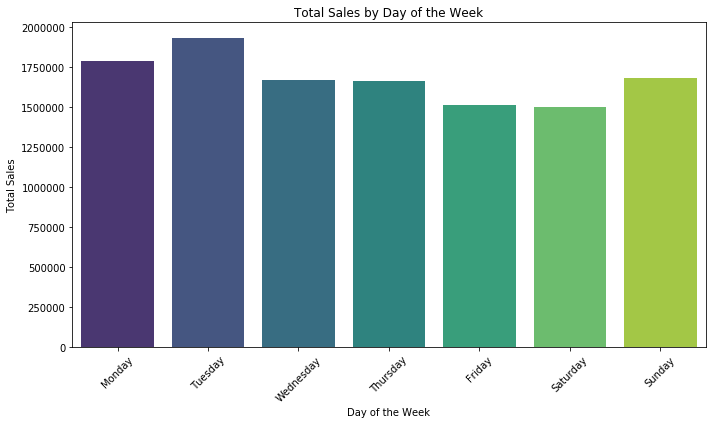

In [11]:
# Filter the DataFrame for months 4 (April), 10 (October), and 12 (December)
filtered_df = df[df['Month'].isin([4, 10, 12])]
# Extract the day of the week from 'Order Date'
filtered_df['Day of Week'] = filtered_df['Order Date'].dt.day_name()

# Calculate total sales if not already done
filtered_df['Total Sales'] = filtered_df['Quantity Ordered'] * filtered_df['Price Each']

# Group by 'Day of Week' and sum the 'Total Sales'
sales_by_day = filtered_df.groupby('Day of Week')['Total Sales'].sum()

# Reorder the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex(days_order)
sales_by_day

# Reorder the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day = sales_by_day.reindex(days_order)

# Plotting the sales by day of the week using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=sales_by_day.index, y=sales_by_day.values, palette='viridis')

# Adding titles and labels
plt.title('Total Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate day labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

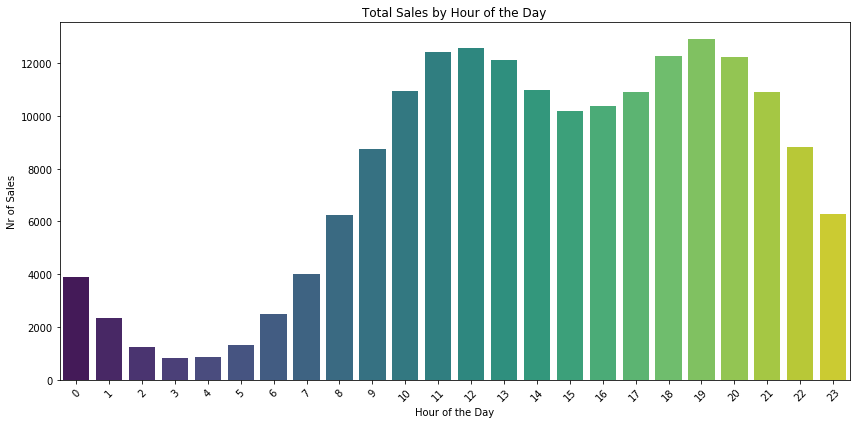

In [16]:
# Extract the hour from 'Order Date'
df['Hour'] = df['Order Date'].dt.hour
# Calculate total sales if not already done
df['Total Sales'] = df['Quantity Ordered'] * df['Price Each']
# Group by 'Hour' and sum the 'Total Sales'
sales_by_hour = df.groupby('Hour')['Total Sales'].count()
sales_by_hour

# Plotting the sales by hour using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_by_hour.index, y=sales_by_hour.values, palette='viridis')

# Adding titles and labels
plt.title('Total Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Nr of Sales')
plt.xticks(rotation=45)  # Rotate hour labels for better readability
plt.tight_layout()

# Show the plot
plt.show()


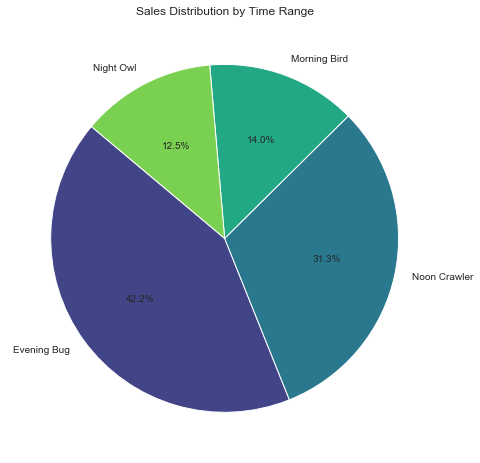

In [21]:
# Define a function to categorize hours into time ranges
def categorize_time(hour):
    if 23 <= hour or hour <= 7:
        return 'Night Owl'
    elif 8 <= hour <= 10:
        return 'Morning Bird'
    elif 11 <= hour <= 15:
        return 'Noon Crawler'
    elif 16 <= hour <= 22:
        return 'Evening Bug'

# Apply the function to create a new column 'Time Range'
df['Time Range'] = df['Hour'].apply(categorize_time)
df.head()

# Count the number of sales for each time range
sales_count_by_time_range = df['Time Range'].value_counts()
# Plotting the pie chart using Matplotlib with Seaborn styling
plt.figure(figsize=(8, 8))
sns.set_style("whitegrid")  # Apply Seaborn theme for better aesthetics
plt.pie(sales_count_by_time_range, labels=sales_count_by_time_range.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(sales_count_by_time_range)))

# Adding a title
plt.title('Sales Distribution by Time Range')

# Show the plot
plt.show()

<Figure size 864x432 with 0 Axes>

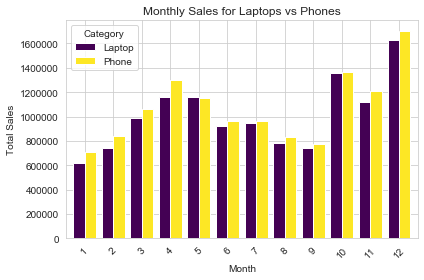

In [22]:
df['Product'].unique()
# Define a function to categorize products
def categorize_product(product_name):
    if 'laptop' in product_name.lower():
        return 'Laptop'
    elif 'phone' in product_name.lower():
        return 'Phone'
    else:
        return 'Other'

# Apply the function to create a new column 'Category'
df['Category'] = df['Product'].apply(categorize_product)
df.head()
# Group by 'Month' and 'Category' and sum the 'Total Sales'
monthly_sales_by_category = df[~(df['Category']=='Other')].groupby(['Month', 'Category'])['Total Sales'].sum().unstack()

# Plotting the dual bar plot using Seaborn
plt.figure(figsize=(12, 6))
monthly_sales_by_category.plot(kind='bar', stacked=False, colormap='viridis', width=0.8)

# Adding titles and labels
plt.title('Monthly Sales for Laptops vs Phones')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.legend(title='Category')
plt.tight_layout()

# Show the plot
plt.show()

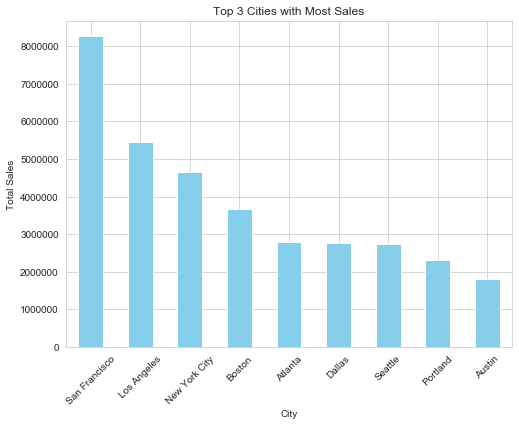

In [23]:
# Define a function to split the string and return the second element
def extract_city(address):
    parts = address.split(',')
    if len(parts) > 1:
        return parts[1].strip()  # Strip to remove any leading/trailing whitespace
    else:
        return np.nan

# Apply the function to create a new column 'City'
df['City'] = df['Purchase Address'].apply(extract_city)
df['City'].unique()

sales_by_city = df.groupby('City')['Total Sales'].sum()

# Sort the cities by total sales in descending order
top_cities = sales_by_city.sort_values(ascending=False)
# Plotting the bar plot
plt.figure(figsize=(8, 6))
top_cities.plot(kind='bar', color='skyblue')

# Adding titles and labels
plt.title('Top 3 Cities with Most Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate city labels for better readability

# Show the plot
plt.show()

In [24]:
# Filter the DataFrame for the specified cities
cities_of_interest = ['New York City', 'San Francisco', 'Los Angeles']
filtered_df = df[df['City'].isin(cities_of_interest)]
# Group by 'Product' and sum the 'Total Sales'
sales_by_product = filtered_df.groupby('Product')['Total Sales'].sum()
# Find the product with the most sales
top_product = sales_by_product.idxmax()
top_sales = sales_by_product.max()

# Display the product with the most sales
print(f"The product with the most sales in {', '.join(cities_of_interest)} is '{top_product}' with total sales of {top_sales}.")

The product with the most sales in New York City, San Francisco, Los Angeles is 'Macbook Pro Laptop' with total sales of 4324800.0.
